In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
from scipy.stats import pearsonr
import glob

In [76]:
def get_domain_df(data_csv):
    data = []
    with open(data_csv, 'r') as file:
        csv_reader = csv.reader(file, delimiter=',')
        for row in csv_reader:
            if row[0] == '':
                continue
            l1 = row[1]
            l2 = row[2]
            alignment = float(row[3])
            w1 = row[4]
            w2 = row[5]
            domain = row[16]
            data.append(dict(l1=l1, 
                             l2=l2, 
                             alignment=alignment, 
                             w1=w1, 
                             w2=w2, 
                             domain=domain))

    lin_data = []
    files = glob.glob('../compute-alignment/w=*')
    for fn in files:
        with open(fn, 'r') as file:
            langs = fn.replace('../compute-alignment/w=', '').split('.')[0].split('-')
            l1, l2 = langs
            csv_reader = csv.reader(file, delimiter=',')
            csv_reader = list(csv_reader)
            n_rows = len(csv_reader)
            if n_rows > 600:
                for row in csv_reader:
                    if row[0] == 'l1':
                        continue
                    w1 = row[2]
                    w2 = row[3]
                    alignment = float(row[4])
                    lin_data.append(dict(l1=l1, 
                                         l2=l2,
                                         w1=w1,
                                         w2=w2,
                                         linear_alignment=alignment))

    lin_df = pd.DataFrame(lin_data)

    df = pd.DataFrame(data)

    df = pd.merge(df, lin_df, how='left', on=['l1', 'l2', 'w1', 'w2'])
    df = df[df['linear_alignment'].notnull()]
#     df = df.groupby('domain').mean()
#     df = df.sort_values(by='alignment')

#     df = df.sort_values(by='linear_alignment')
    
    return df

In [77]:
df = get_domain_df('../alignments-nel-wiki-trl.csv')

In [78]:
df = df.rename(columns={'linear_alignment': 'Orthogonal Alignment', 'alignment': 'Nearest Neighbors Alignment'})

In [79]:
df

,l1,l2,Nearest Neighbors Alignment,w1,w2,domain,Orthogonal Alignment
2513,ba,sah,-0.199714,ул,уол,Kinship,-0.003019
2514,ba,sah,-0.162759,бәреү,оҕус,Basic actions and technology,-0.003246
2515,ba,sah,-0.149826,плита,билиитэ,Modern world,-0.003278
2516,ba,sah,-0.135485,ау,илим,Basic actions and technology,-0.002732
2517,ba,sah,-0.132289,иреү,ир,Basic actions and technology,-0.003108
...,...,...,...,...,...,...,...
1828615,ru,de,0.939347,четыре,vier,Quantity,-0.000684
1828616,ru,de,0.940166,шестьдесят,sechzig,Quantity,-0.001094
1828617,ru,de,0.943769,семь,sieben,Quantity,-0.000732
1828618,ru,de,0.945289,девять,neun,Quantity,-0.000663


In [80]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [81]:
df = df.groupby(['l1', 'l2', 'domain']).mean().reset_index()

Index(['The house', 'Basic actions and technology', 'Motion',
       'Agriculture and vegetation', 'Clothing and grooming', 'Modern world',
       'The body', 'Possession', 'Spatial relations', 'Emotions and values',
       'Social and political relations', 'The physical world', 'Animals',
       'Food and drink', 'Speech and language', 'Cognition',
       'Sense perception', 'Miscellaneous function words', 'Time', 'Kinship',
       'Quantity'],
      dtype='object', name='domain')


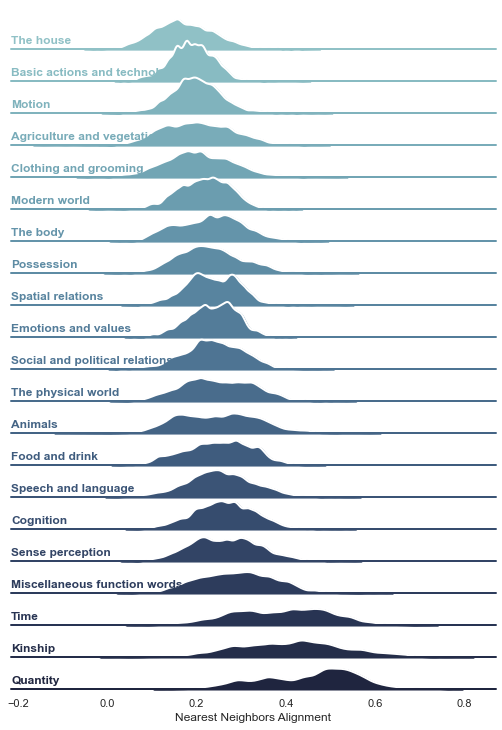

In [82]:
alignment_type = 'Nearest Neighbors Alignment'
order_df = df.groupby('domain').mean()
order = order_df.sort_values(by=alignment_type).index
print(order)
pal = sns.cubehelix_palette(len(order), rot=-.25, light=.7)
g = sns.FacetGrid(df, row="domain", hue="domain", aspect=15, height=.5, palette=pal, row_order=order, hue_order=order)

# Draw the densities in a few steps
g.map(sns.kdeplot, alignment_type,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, alignment_type, clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, alignment_type)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.figure.savefig('alignment_concept.pdf')

Index(['The house', 'Basic actions and technology', 'Modern world',
       'Agriculture and vegetation', 'Clothing and grooming', 'Motion',
       'Spatial relations', 'Emotions and values', 'The physical world',
       'Animals', 'The body', 'Sense perception', 'Possession',
       'Food and drink', 'Social and political relations',
       'Speech and language', 'Cognition', 'Miscellaneous function words',
       'Time', 'Kinship', 'Quantity'],
      dtype='object', name='domain')


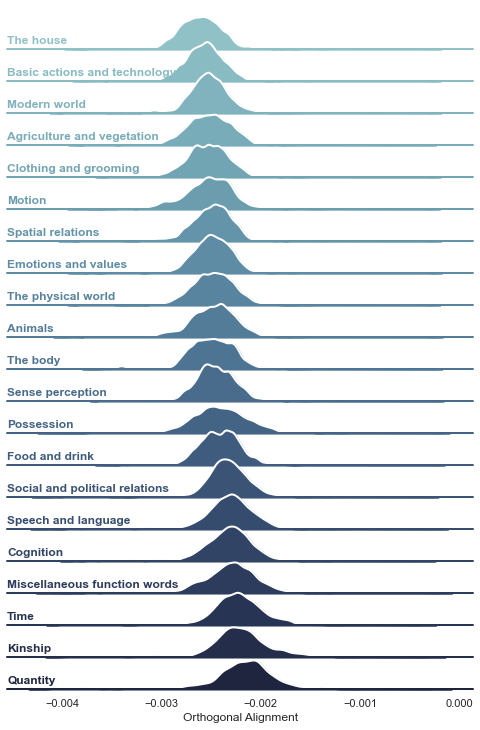

In [83]:
alignment_type = 'Orthogonal Alignment'
order_df = df.groupby('domain').mean()
order = order_df.sort_values(by=alignment_type).index
print(order)
# sns.set(rc={'figure.figsize':(15, 6)})
pal = sns.cubehelix_palette(len(order), rot=-.25, light=.7)
g = sns.FacetGrid(df, row="domain", hue="domain", aspect=15, height=.5, palette=pal, row_order=order, hue_order=order)

# Draw the densities in a few steps
g.map(sns.kdeplot, alignment_type,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, alignment_type, clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, alignment_type)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.figure.savefig('orthogonal_alignment_concept.pdf')

In [84]:
g.figure.savefig('orthogonal_alignment_concept.png')

In [75]:
df

,l1,l2,domain,Nearest Neighbors Alignment,Orthogonal Alignment
0,ab,ar,Agriculture and vegetation,0.100096,-0.003859
1,ab,ar,Animals,0.037567,-0.003910
2,ab,ar,Basic actions and technology,0.090920,-0.003663
3,ab,ar,Cognition,0.060769,-0.003502
4,ab,ar,Emotions and values,-0.013974,-0.003807
...,...,...,...,...,...
15790,xal,ml,Speech and language,0.117994,-0.003363
15791,xal,ml,The body,0.007430,-0.003447
15792,xal,ml,The house,0.021081,-0.003313
15793,xal,ml,The physical world,0.056744,-0.003540
